## Basic quality control for neuroimaging data

In this example, we demonstrate some simple examples of how to do some basic quality control on neuroimaging data. For this, we will use a real neuroimaging dataset, derived from the [CAMCAN](https://www.cam-can.org/index.php?content=dataset) study. The data we will use here contain basic demographic information and measures of cortical thickness estimated using the [Freesurfer](https://surfer.nmr.mgh.harvard.edu/) software package. A note on naming: lh_xxx indicates cortical thickness estimates for different regions in the left hemisphere and rh_xxx indicates cortical thickness estimates for regions in the right hemisphere

First, we need to import some python modules. As well as the matplotlib plotting library we used in the previous demo, we will also include the seaborn library, which generates 'prettier' plots and has some nice functions that we will use in this exercise.

In [1]:
import os
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

## As before, first we will get the data. 

There are two options for this.

## Option 1: download the data to your Google drive

You can do this by saving the 'camcan_dataset.csv' file from
[Github](https://github.com/predictive-clinical-neuroscience/BigDataCourse/blob/main/data/)
to your Google drive account. 

In [ ]:
# needed for you to be able to save the necessary data to your google drive
from google.colab import drive
drive.mount('/content/drive')

# change dir to data on your google drive
# change BMS85/data to where you saved mill.mat 
os.chdir('drive/MyDrive/BMS85/') 

## Option 2: get the data directly from GitHub

It is not necessary to understand the details of the wget command for this. Basically it just fetches the data

In [2]:
!wget -nc https://raw.githubusercontent.com/predictive-clinical-neuroscience/BigDataCourse/main/data/camcan_dataset.csv

--2020-11-25 15:45:24--  https://raw.githubusercontent.com/predictive-clinical-neuroscience/BigDataCourse/main/data/camcan_dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.36.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.36.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 361298 (353K) [text/plain]
Saving to: ‘camcan_dataset.csv’

camcan_dataset.csv  100%[===================>] 352,83K   867KB/s    in 0,4s    

2020-11-25 15:45:25 (867 KB/s) - ‘camcan_dataset.csv’ saved [361298/361298]



Now, let's load the data as a pandas dataframe

In [2]:
cam_data = pd.read_csv('../data/camcan_dataset.csv', index_col=0) 

cam_data

,participant_id,age,sex,site,lh_bankssts_thickness,lh_caudalanteriorcingulate_thickness,lh_caudalmiddlefrontal_thickness,lh_cuneus_thickness,lh_entorhinal_thickness,lh_fusiform_thickness,...,rh_superiorfrontal_thickness,rh_superiorparietal_thickness,rh_superiortemporal_thickness,rh_supramarginal_thickness,rh_frontalpole_thickness,rh_temporalpole_thickness,rh_transversetemporal_thickness,rh_insula_thickness,rh_MeanThickness_thickness,euler
0,sub-CC110033,24,1,cam,2.529,2.402,2.774,1.721,3.644,2.891,...,2.910,2.256,3.042,2.675,2.717,3.782,2.565,3.179,2.61175,-62.0
1,sub-CC110037,18,1,cam,2.440,3.169,2.626,1.676,3.081,2.845,...,2.844,2.250,2.870,2.484,2.795,3.646,2.620,3.261,2.56314,-47.0
2,sub-CC110045,24,2,cam,2.795,2.861,2.957,2.015,3.175,2.967,...,2.914,2.466,3.125,2.971,3.026,2.984,2.816,3.219,2.72460,-52.0
3,sub-CC110056,22,2,cam,2.704,2.675,2.788,2.259,3.027,3.071,...,2.955,2.436,3.181,2.886,2.768,3.966,2.709,3.312,2.73048,-56.0
4,sub-CC110062,20,1,cam,2.704,2.694,2.712,2.206,3.214,2.909,...,2.872,2.485,3.023,2.883,2.718,2.811,2.712,3.122,2.67901,-107.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,sub-CC723197,80,2,cam,2.562,2.049,2.679,1.940,3.236,2.663,...,2.798,2.392,2.731,2.476,2.678,3.786,2.285,2.871,2.49169,-129.0
643,sub-CC723395,86,2,cam,2.518,2.829,2.788,1.929,3.438,2.961,...,2.806,2.147,2.815,2.507,2.942,3.426,2.292,2.917,2.47185,-110.0
644,sub-CC610096,74,2,cam,2.515,2.983,2.728,2.122,3.318,2.781,...,2.721,2.413,2.661,2.596,2.944,3.736,2.377,2.873,2.57205,-97.0
645,sub-CC710501,80,1,cam,2.571,2.824,2.165,1.777,3.138,2.693,...,2.419,2.065,2.582,2.302,2.487,2.858,1.989,2.548,2.30121,-153.0


Let's start to take a look at the data. First, let's look at the distribution of the basic demographic variables. We will use fancier plotting methods below, but first we will use basic histograms

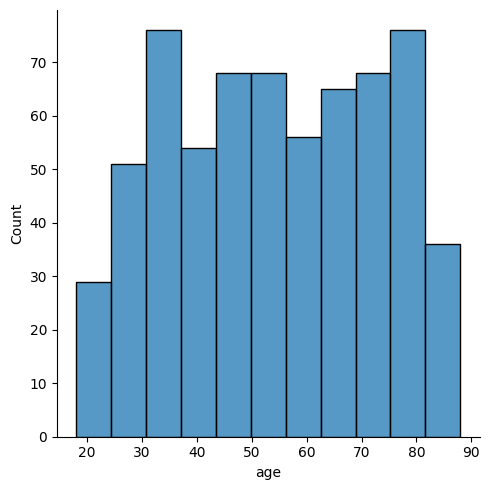

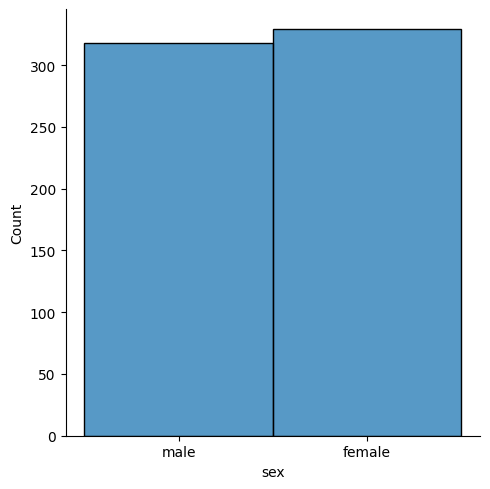

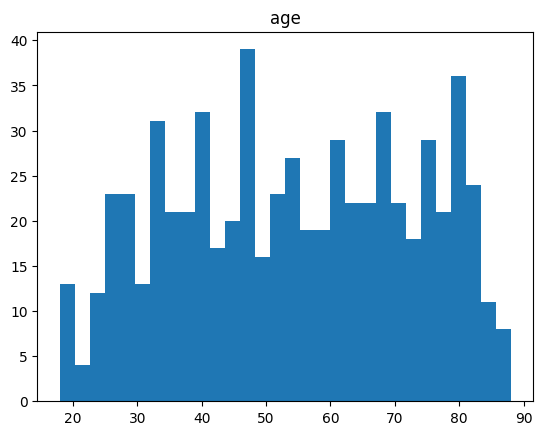

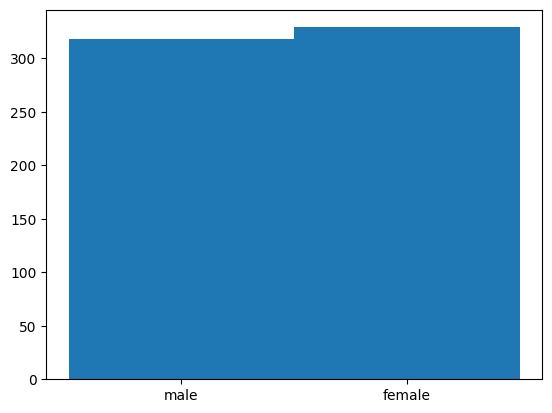

In [8]:
sns.displot(cam_data['age'])
plt.show()

sns.displot(cam_data['sex'], discrete=True)
plt.xticks([1,2], ['male','female'])
plt.show()

# we can also do the same using more basic plotting routines
# to do that uncomment the following lines
plt.hist(cam_data['age'], bins=30)
plt.title('age')
plt.show()

plt.hist(cam_data['sex'],bins=2)
plt.xticks([1.25,1.75], ['male','female'])
plt.show()

We can take a look at the raw data matrix. To simplify the code, we first extract a new data frame that contains only the cortical thickness values. We exclude the demographic measures (columns 0-3) and the Euler characteristic (last column)

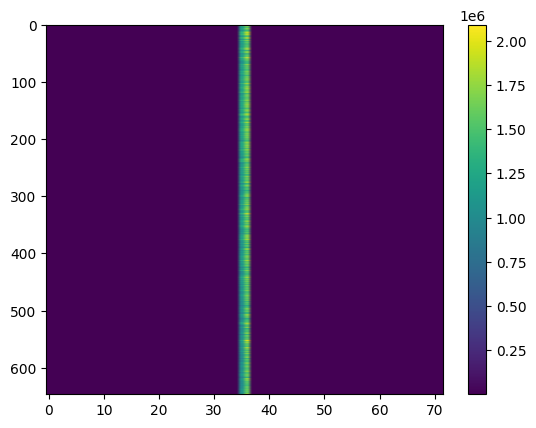

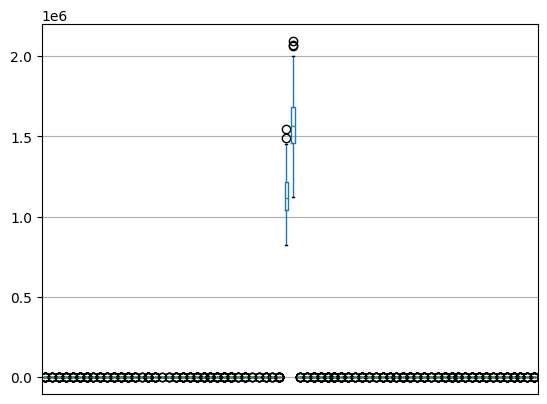

In [4]:
ct_cols = cam_data.columns[4:-1]
ct_data = cam_data[ct_cols]

plt.imshow(ct_data, aspect='auto')
plt.colorbar()
plt.show()

ct_data.boxplot()
plt.xticks([])  # remove the axis labels to stop the plot getting messy
plt.show()

You can see that the scale of the data in two of the columns is much higher that the others. Let's zoom in a bit and look a bit more closely at the distribution of the data...

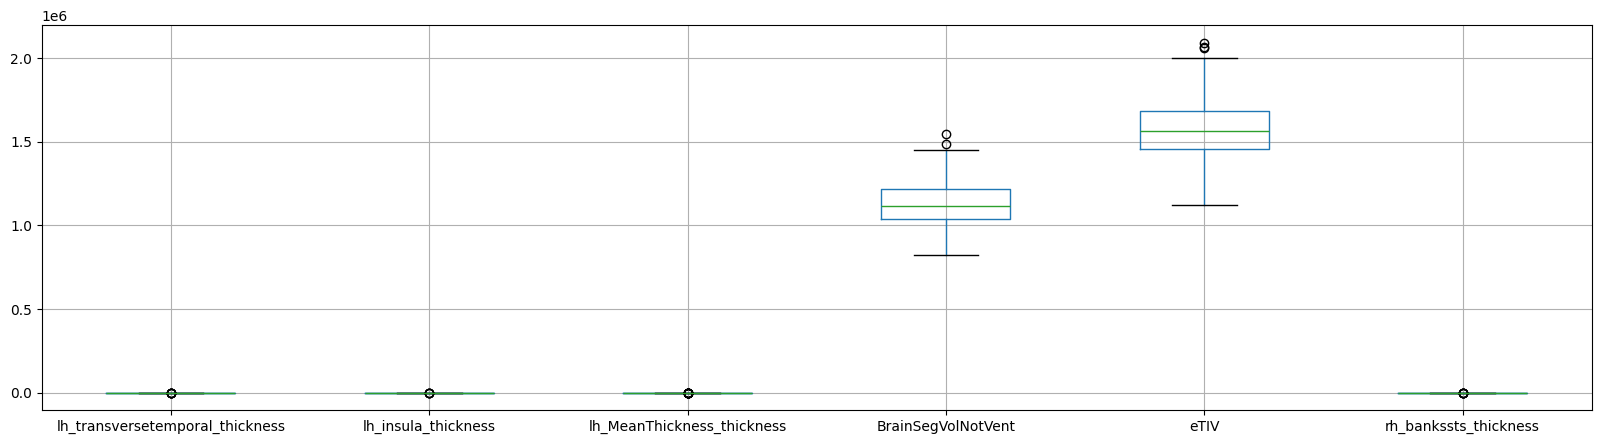

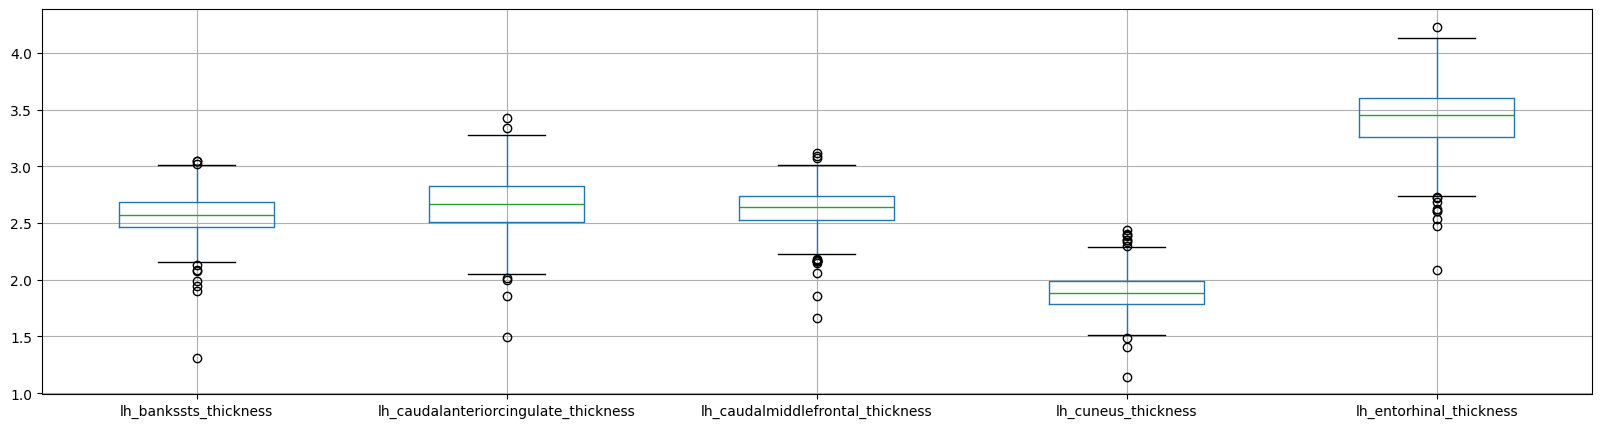

In [5]:
ct_data[ct_cols[32:38]].boxplot(figsize=(20,5))
plt.show()

ct_data[ct_cols[0:5]].boxplot(figsize=(20,5))
plt.show()

The variables that have higher values are overall brain volume (BrainSegVolNotVent) and total intracranial volume (eTIV). This makes sense because the data are on different scales and measure different things (cortical thickness is measured in millimeters and volume is measures in cubic millimeters). We can remove this difference by standardizing the data.

This forces the data in each column to have a mean of zero and standard deviation of zero.

**Warning:** here we are using this technique to better visualise the data. You can also do that prior to analysis, but it has consequences! For example, it changes the interpretation of the regression coefficients. 

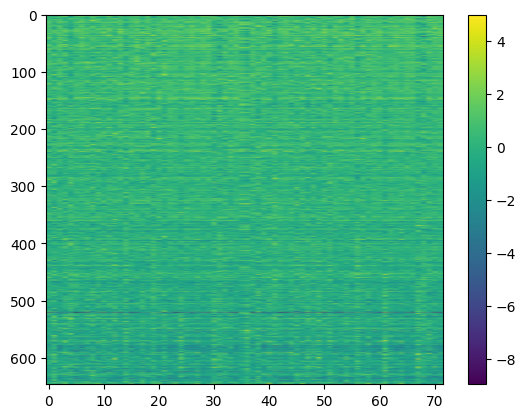

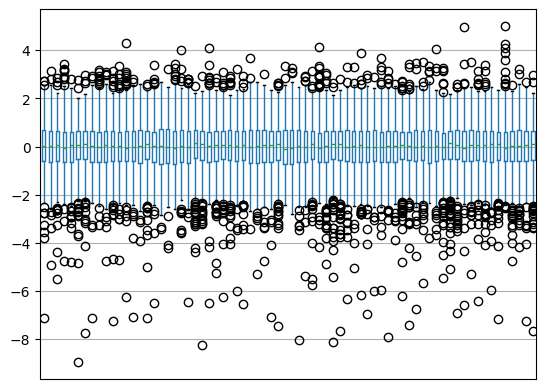

In [6]:
ct_data_z = (ct_data - ct_data.mean()) / ct_data.std()

plt.imshow(ct_data_z, aspect='auto')
plt.colorbar()
plt.show()

ct_data_z.boxplot()
plt.xticks([])  # remove the axis labels to stop the plot getting messy
plt.show()

**Q: what do you notice about the distribution of the data in general? Is it symmetric?**

## Basic QC operations

This fairly advanced material, but is presented to give you an idea about how to clean data

Now, the above dataset is fairly complete but most real data are not and have missing data and some problems. To see an example of such a dataset you can saving the 'camcan_dataset_QC.csv' file from
[Github](https://github.com/predictive-clinical-neuroscience/BigDataCourse/blob/main/data/)
to your Google drive account *or* use the wget command below:


In [22]:
!wget -nc https://raw.githubusercontent.com/predictive-clinical-neuroscience/BigDataCourse/main/data/camcan_dataset_QC.csv

-------- freesurfer-darwin-macOS-7.3.2-20220804-6354275 --------
Setting up environment for FreeSurfer/FS-FAST (and FSL)
FREESURFER_HOME   /Applications/freesurfer/7.3.2
FSFAST_HOME       /Applications/freesurfer/7.3.2/fsfast
FSF_OUTPUT_FORMAT nii.gz
SUBJECTS_DIR      /Applications/freesurfer/7.3.2/subjects
MNI_DIR           /Applications/freesurfer/7.3.2/mni
FSL_DIR           /usr/local/fsl
File ‘camcan_dataset_QC.csv’ already there; not retrieving.



In [9]:
cam_qc = pd.read_csv('../data/camcan_dataset_QC.csv', index_col=0)
cam_qc.shape

(647, 77)

It is common in real datasets that some data are missing (e.g. because a particular assessment was missed). You can see one example where this has happened in the table above. In this case this is coded as NaN (not a number) but be aware that this may not always be the case, and other codings may be used. We can check how many variables are missing using the pandas isna() function, i.e.:

In [10]:
cam_qc.isna()

,participant_id,age,sex,site,lh_bankssts_thickness,lh_caudalanteriorcingulate_thickness,lh_caudalmiddlefrontal_thickness,lh_cuneus_thickness,lh_entorhinal_thickness,lh_fusiform_thickness,...,rh_superiorfrontal_thickness,rh_superiorparietal_thickness,rh_superiortemporal_thickness,rh_supramarginal_thickness,rh_frontalpole_thickness,rh_temporalpole_thickness,rh_transversetemporal_thickness,rh_insula_thickness,rh_MeanThickness_thickness,euler
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
643,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
644,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
645,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Then we can count the number of missing values. Here we sum these twice, once across the rows, then across the columns

In [11]:
cam_qc.isna().sum().sum()

np.int64(9)

Since there are not many missing values, in this case we make the decision to drop all samples with one or more missing variables. The arguments to the dropna() function tell the function that we want to remove each sample with any missing variables and that we do it 'in place', that is, without making a copy of the data frame. 

In [12]:
print(cam_qc.shape)

cam_qc.dropna(how='any', inplace=True)

print(cam_qc.shape)

(647, 77)
(642, 77)


As you can see, we lose 5 subjects, so in this case the effect of dropping these subjects will be minor. Again, however, we should not do this blindly since there may be important reasons for why data are missing. Now, let's take a peek at the data. We already know about the different scalings in the data, so we will proceed straight to z-scoring the data... 

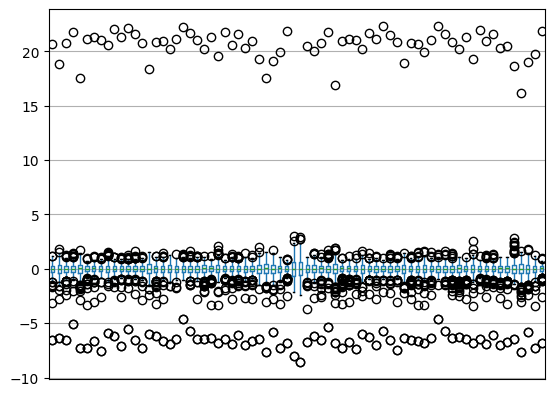

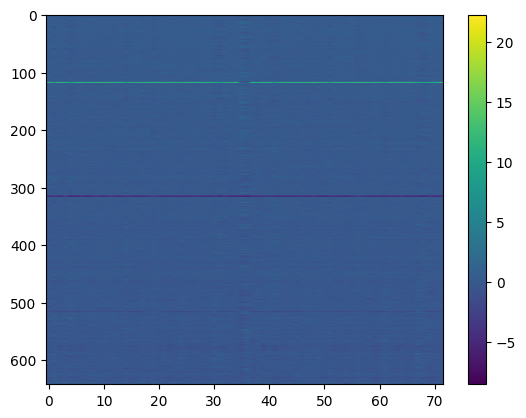

In [27]:
ct_cols = cam_data.columns[4:-1]
ct_data_qc = cam_qc[ct_cols]

ct_data_qc_z = (ct_data_qc - ct_data_qc.mean()) / ct_data_qc.std()

ct_data_qc_z.boxplot()
plt.xticks([])  # remove the axis labels to stop the plot getting messy
plt.show()

plt.imshow(ct_data_qc_z, aspect='auto')
plt.colorbar()
plt.show()

Oh dear!  In this case, we have some pretty nasty outliers in the data. It looks like there are a couple of subjects that have very extreme values. This also evident in a plot of mean cortical thickness against age (we know there is a negative relationship between these variables because the cortex thins as we age)

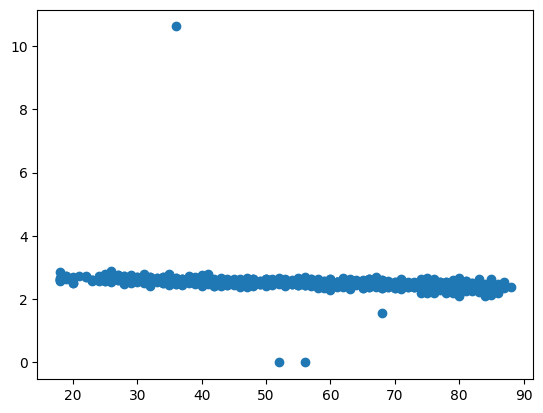

In [28]:
plt.scatter(cam_qc['age'], cam_qc['rh_MeanThickness_thickness'])
plt.show()

We can also look at the raw data for samples having extreme values. For this, we choose and **arbitrary** cutoff of 5 standard deviations away from the mean

In [29]:
ct_data_qc.loc[(np.abs(ct_data_qc_z) > 5).any(axis=1)]

,lh_bankssts_thickness,lh_caudalanteriorcingulate_thickness,lh_caudalmiddlefrontal_thickness,lh_cuneus_thickness,lh_entorhinal_thickness,lh_fusiform_thickness,lh_inferiorparietal_thickness,lh_inferiortemporal_thickness,lh_isthmuscingulate_thickness,lh_lateraloccipital_thickness,...,rh_rostralmiddlefrontal_thickness,rh_superiorfrontal_thickness,rh_superiorparietal_thickness,rh_superiortemporal_thickness,rh_supramarginal_thickness,rh_frontalpole_thickness,rh_temporalpole_thickness,rh_transversetemporal_thickness,rh_insula_thickness,rh_MeanThickness_thickness
123,10.702000,10.623000,10.903000,9.992000,11.735000,10.988000,10.571000,10.967000,10.531000,10.339000,...,10.395000,10.852000,10.295000,11.076000,10.567000,10.799000,11.536000,10.482000,11.142000,10.613410
320,0.000003,0.000002,0.000003,0.000002,0.000004,0.000003,0.000002,0.000003,0.000002,0.000002,...,0.000002,0.000003,0.000002,0.000003,0.000003,0.000003,0.000004,0.000003,0.000003,0.000003
321,0.000002,0.000003,0.000003,0.000002,0.000003,0.000003,0.000002,0.000003,0.000002,0.000002,...,0.000002,0.000003,0.000002,0.000003,0.000003,0.000003,0.000004,0.000002,0.000003,0.000003


These are clearly implausible values for cortical thickness (which is measured in millimeters). In a real data example we may wish to dig a bit deeper to find out how these values got corrupted. However, here we make the pragmatic decision to drop these subjects. You can ignore the warning here

In [30]:
ct_data_qc.drop(ct_data_qc_z[(np.abs(ct_data_qc_z) > 5).any(axis=1)].index, inplace=True)

# also drop from this dataframe
cam_qc.drop(ct_data_qc_z[(np.abs(ct_data_qc_z) > 5).any(axis=1)].index, inplace=True)

# now reset the index
ct_data_qc = ct_data_qc.reset_index(drop=True)

/var/folders/kj/3t_l651s5qn4v47r5x0vcmyh0000gn/T/ipykernel_16154/581120529.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ct_data_qc.drop(ct_data_qc_z[(np.abs(ct_data_qc_z) > 5).any(axis=1)].index, inplace=True)


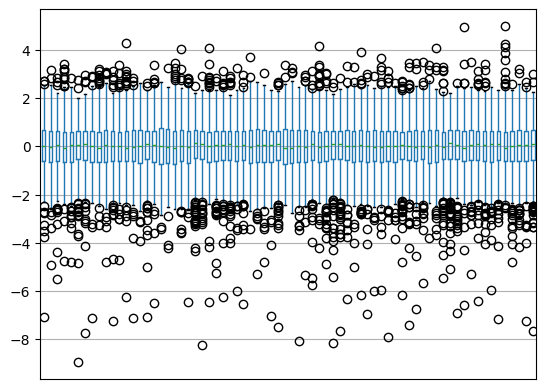

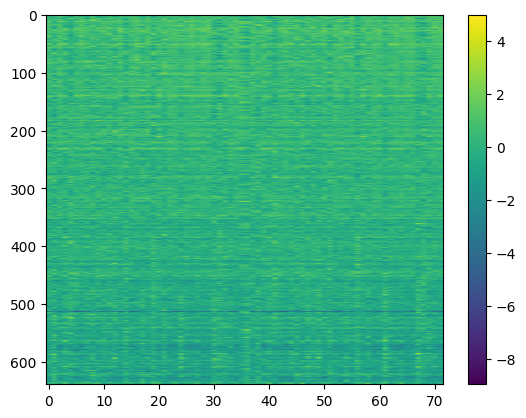

In [32]:
ct_data_qc_z = (ct_data_qc - ct_data_qc.mean()) / ct_data_qc.std()

ct_data_qc_z.boxplot()
plt.xticks([])  # remove the axis labels to stop the plot getting messy
plt.show()

plt.imshow(ct_data_qc_z, aspect='auto')
plt.colorbar()
plt.show()

Now we re-evaluate the distribution of data

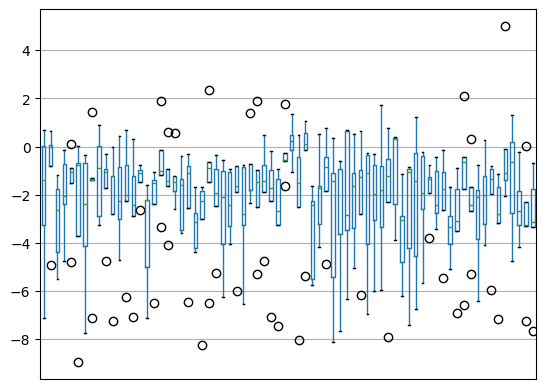

In [33]:
ct_data_z.loc[(np.abs(ct_data_z) > 5).any(axis=1)].boxplot()
plt.xticks([])  # remove the axis labels to stop the plot getting messy
plt.show()

Even these data are better behaved. There are occasional deviations with |Z| > 5 but that is to be expected in a dataset of this size. We replot the relationship between mean cortical thickness and age

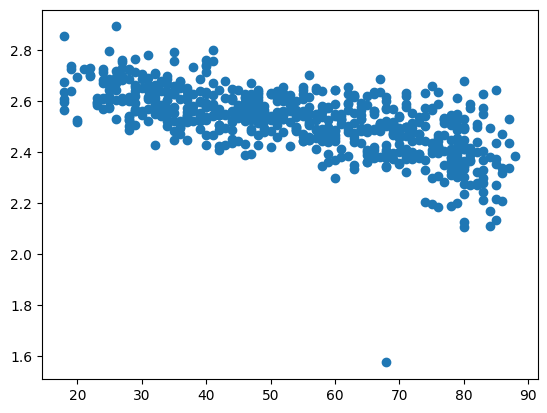

In [34]:
plt.scatter(cam_qc['age'], cam_qc['rh_MeanThickness_thickness'])
plt.show()

You can see that this has mostly cleaned up the scatter plot we showed above and now the relationship between cortical thickness and is more evident, although we still have one outlying data point remaining. 

However, this is still within the plausible range This illustrates the difficulty in knowing what is signal and what is noise. To help us here, we can use the Freesurfer Euler characteristic (EC) to identify potentially problematic scans, since that is known to be associated with scan quality, as shown in [this paper](https://www.sciencedirect.com/science/article/pii/S1053811917310832?via%3Dihub)

**Warning:** This should not really be done in a blind fashion. We should also check the logs and manually investigate the quality of the reconstructions

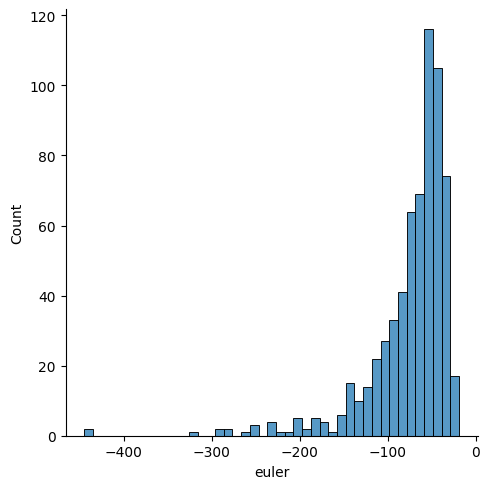

In [35]:
sns.displot(cam_data['euler'])
plt.show()

So from this plot, we can see that at least one and possibly more scans may have questionable scan quality. It would be wise to investigate further. For this exercise we can say that we checked these scans and decide to exclude them based on manual inspection of the reconstructed surfaces. We decide to remove all subjects having an EC < -400. **Again, you should be aware that this threshold is arbitrary!**

In [36]:
cam_qc['euler'].loc[cam_qc['euler'] < -400]

521   -438.0
616   -445.0
Name: euler, dtype: float64

In [37]:
cam_qc.drop(cam_qc.loc[cam_qc['euler'] < -400].index, inplace=True)

Finally, we replot the relationship between age and mean cortical thickness

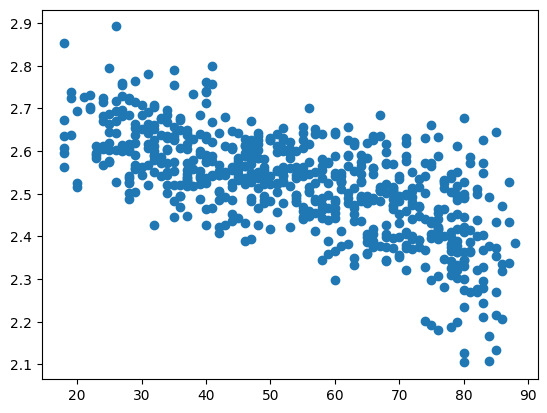

In [38]:
plt.scatter(cam_qc['age'], cam_qc['rh_MeanThickness_thickness'])
plt.show()

And you can see that the final outlier has been removed